<a href="https://colab.research.google.com/github/Archi911/Dementia_Prediction/blob/main/Dementia_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dementia Prediction ML** **Project**

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load The Dataset

In [300]:
dataset = pd.read_csv('Dataset.csv')

In [301]:
#printing first 5 rows
dataset.head()

,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,...,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,1,52.67,male,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,...,Yes,more-than-zero,2 to 3,scans,scans,3.0,7.0,3,>5,>=1
1,10,64.58,male,0.0,0,10.0,1.280000,0.360000,0.744000,0,...,Yes,more-than-zero,0 to 1,scans,scans,2.0,3.0,1,1 to 2,>=1
2,100,74.92,male,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,...,Yes,more-than-zero,0 to 1,scans,scans,1.0,2.0,1,1 to 2,0
3,101,74.83,male,1.0,1,9.0,NaN,-2.136271,-1.301102,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,4.0,2,3 to 5,0
4,102,79.25,male,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,3.0,2,1 to 2,0


In [302]:
# Deleting column that is not required
dataset.drop(columns=['ID', 'study', 'study1'], inplace=True)
dataset.head()

,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,52.67,male,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,current-smoker,Yes,Yes,more-than-zero,2 to 3,3.0,7.0,3,>5,>=1
1,64.58,male,0.0,0,10.0,1.280000,0.360000,0.744000,0,ex-smoker,Yes,Yes,more-than-zero,0 to 1,2.0,3.0,1,1 to 2,>=1
2,74.92,male,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,never-smoker,Yes,Yes,more-than-zero,0 to 1,1.0,2.0,1,1 to 2,0
3,74.83,male,1.0,1,9.0,NaN,-2.136271,-1.301102,0,current-smoker,Yes,Yes,more-than-zero,2 to 3,2.0,4.0,2,3 to 5,0
4,79.25,male,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,ex-smoker,Yes,Yes,more-than-zero,2 to 3,2.0,3.0,2,1 to 2,0


In [303]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1842 non-null   float64
 1   gender                1842 non-null   object 
 2   dementia              1808 non-null   float64
 3   dementia_all          1842 non-null   int64  
 4   educationyears        1842 non-null   float64
 5   EF                    1634 non-null   float64
 6   PS                    1574 non-null   float64
 7   Global                1534 non-null   float64
 8   diabetes              1842 non-null   int64  
 9   smoking               1831 non-null   object 
 10  hypertension          1842 non-null   object 
 11  hypercholesterolemia  1842 non-null   object 
 12  lacunes_num           1842 non-null   object 
 13  fazekas_cat           1842 non-null   object 
 14  SVD Simple Score      1165 non-null   float64
 15  SVD Amended Score    

In [304]:
# Check for missing values
dataset.isnull().sum()

,0
age,0
gender,0
dementia,34
dementia_all,0
educationyears,0
EF,208
PS,268
Global,308
diabetes,0
smoking,11


In [305]:
raw_dataset = dataset.copy()

In [306]:
# Filling missing numerical values with mean
for col in dataset.select_dtypes(include=['float64', 'int64']):
    dataset[col].fillna(dataset[col].mean(), inplace=True)

/tmp/ipython-input-306-3876639596.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].mean(), inplace=True)


Analyzing The Data

In [307]:
# get the number of rows and columns
dataset.shape

(1842, 19)

In [308]:
# getting statistical values from the dataset
dataset.describe()

,age,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,SVD Simple Score,SVD Amended Score,Fazekas
count,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000
mean,65.952588,0.045354,0.062975,11.139522,-0.063088,-0.066649,-0.026860,0.122693,0.719313,1.491845,1.311075
std,8.923488,0.206206,0.242984,2.983946,0.739574,0.805883,0.617843,0.328173,0.741131,1.290750,0.799495
min,38.000000,0.000000,0.000000,1.000000,-5.200000,-2.680000,-2.420000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,0.000000,0.000000,9.000000,-0.360000,-0.550000,-0.362500,0.000000,0.000000,1.000000,1.000000
50%,66.151393,0.000000,0.000000,10.000000,0.010000,-0.066649,-0.026860,0.000000,0.719313,1.491845,1.000000
75%,73.000000,0.000000,0.000000,13.000000,0.440000,0.450000,0.333333,0.000000,1.000000,1.491845,2.000000
max,90.000000,1.000000,1.000000,24.000000,2.350000,2.730000,1.853333,1.000000,3.000000,7.000000,3.000000


Visualizing the Data

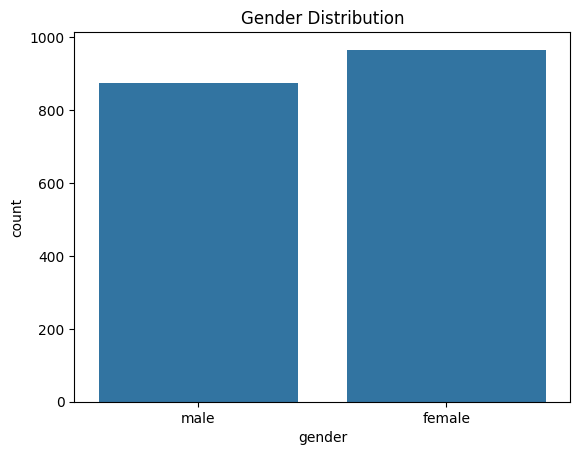

In [309]:
# Gender distribution
sns.countplot(data=dataset, x='gender')
plt.title('Gender Distribution')
plt.show()

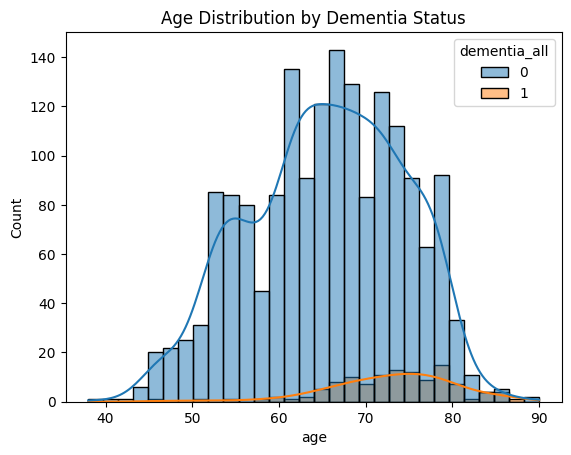

In [310]:
# Age distribution
sns.histplot(data=dataset, x='age', hue='dementia_all', bins=30, kde=True)
plt.title('Age Distribution by Dementia Status')
plt.show()

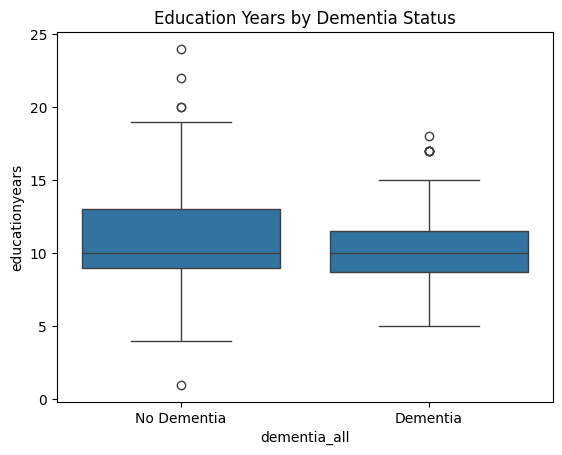

In [311]:
# Creating Boxplot Education years vs dementia
sns.boxplot(data=dataset, x='dementia_all', y='educationyears')
plt.title('Education Years by Dementia Status')
plt.xticks([0, 1], ['No Dementia', 'Dementia'])
plt.show()

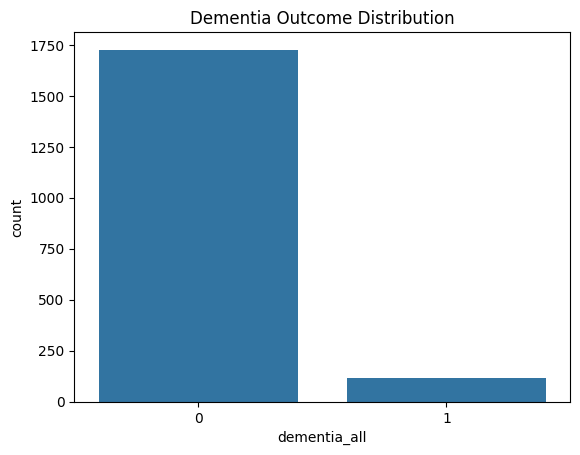

In [312]:
# Creating countplot to count number of people having dementia
sns.countplot(data=dataset, x='dementia_all')
plt.title('Dementia Outcome Distribution')
plt.show()

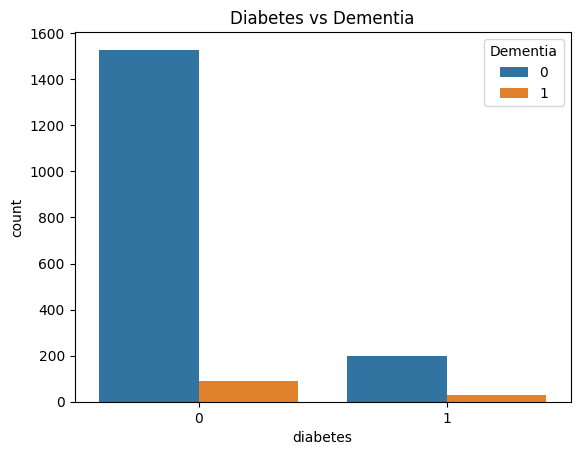

In [313]:
# Creating countplot for Diabetes vs Dementia
sns.countplot(data=dataset, x='diabetes', hue='dementia_all')
plt.title('Diabetes vs Dementia')
plt.legend(title='Dementia')
plt.show()

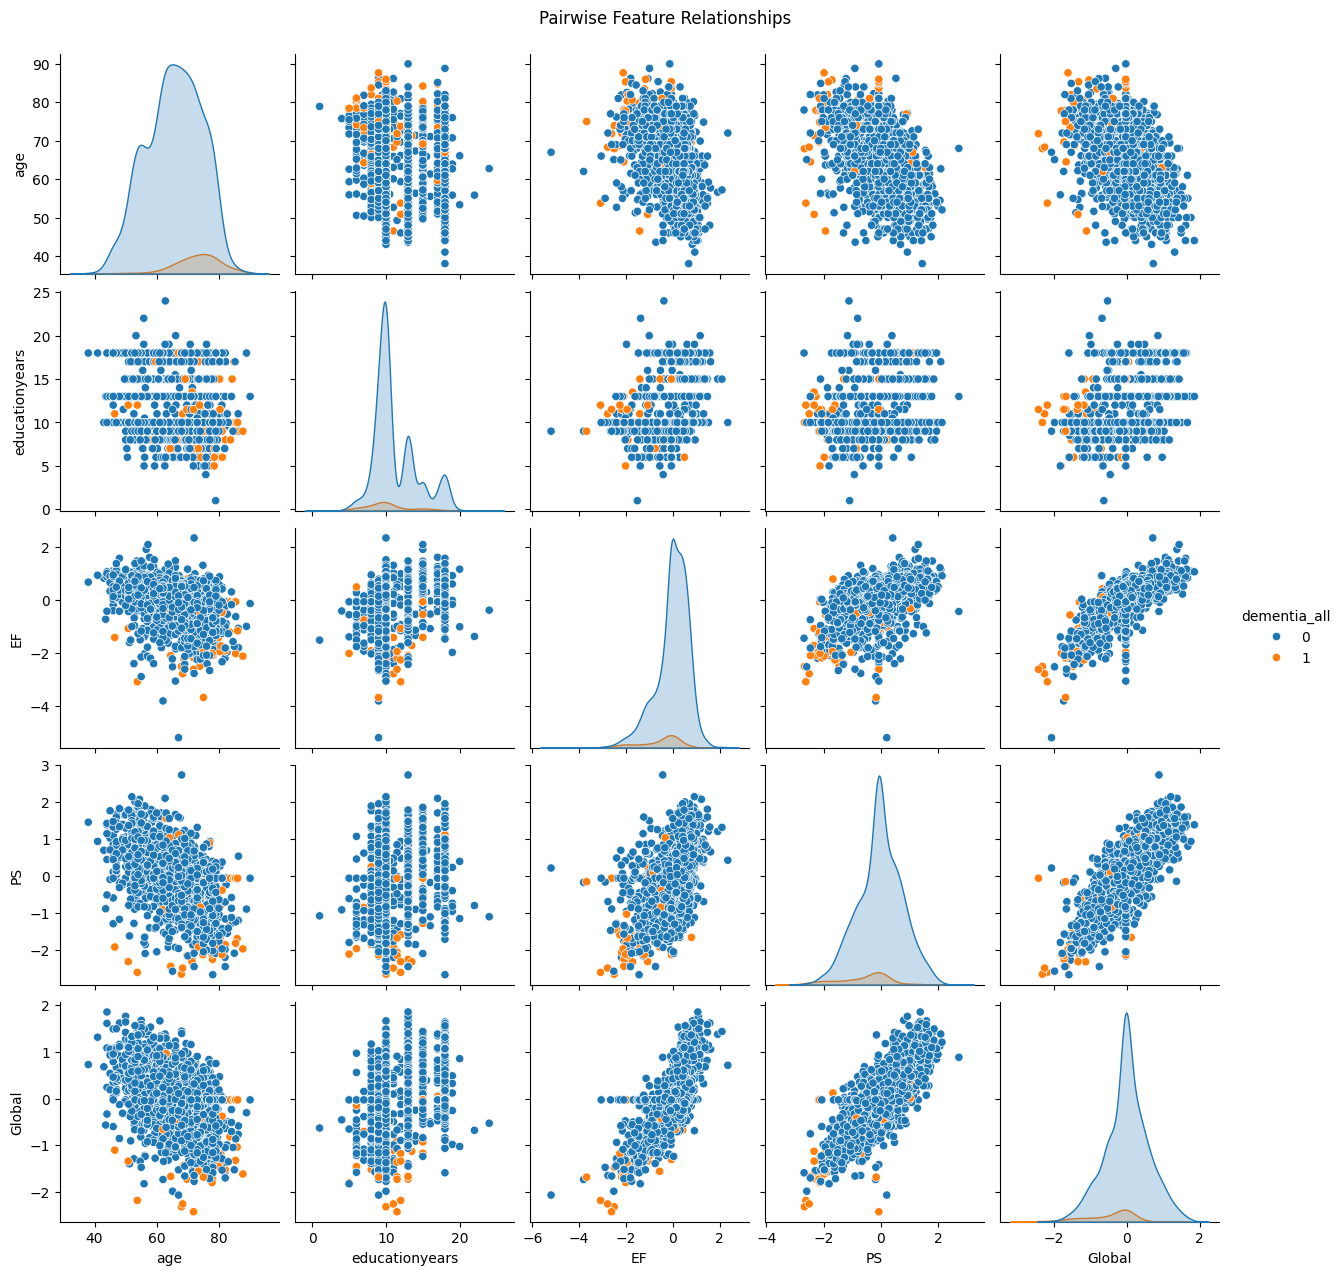

In [314]:
# Pairplot of selected features
sns.pairplot(dataset[['age', 'educationyears', 'EF', 'PS', 'Global', 'dementia_all']], hue='dementia_all')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

In [315]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [316]:
for col in raw_dataset.select_dtypes(include='object'):
    raw_dataset[col] = le.fit_transform(raw_dataset[col].astype(str))

raw_dataset.head()

,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,52.67,1,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,0,1,1,0,1,3.0,7.0,3,2,1
1,64.58,1,0.0,0,10.0,1.280000,0.360000,0.744000,0,1,1,1,0,0,2.0,3.0,1,0,1
2,74.92,1,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,3,1,1,0,0,1.0,2.0,1,0,0
3,74.83,1,1.0,1,9.0,NaN,-2.136271,-1.301102,0,0,1,1,0,1,2.0,4.0,2,1,0
4,79.25,1,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,1,1,1,0,1,2.0,3.0,2,0,0


Finding Correlation Matrix by creating Heatmap

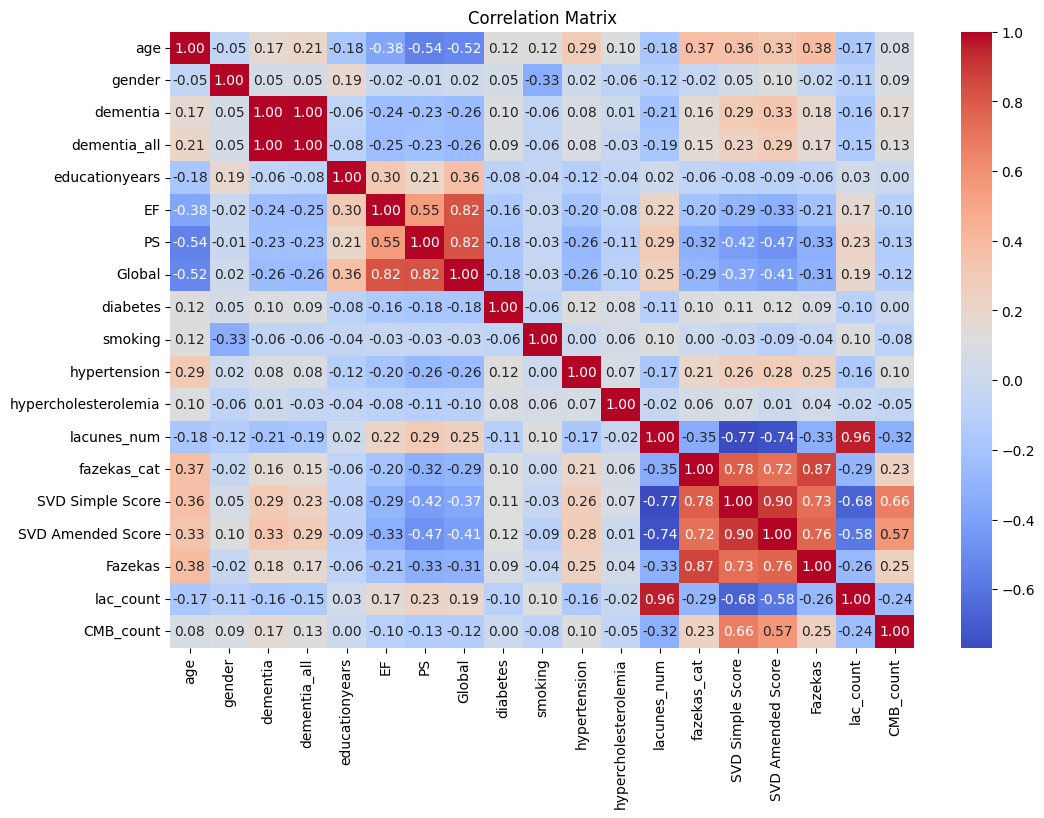

In [317]:
plt.figure(figsize=(12,8))
sns.heatmap(raw_dataset.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Separating Features and Target

In [318]:
X = raw_dataset.drop('dementia_all', axis=1)
y = raw_dataset['dementia_all']

Training the model

In [319]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [320]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [321]:
y_pred = rf.predict(X_test)

Evaluation of the Model

In [322]:
# Calculating the accuracy of the Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred)*100)

Accuracy: 100.0


In [323]:
print( confusion_matrix(y_test, y_pred))

[[344   0]
 [  0  25]]


In [324]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       344
           1       1.00      1.00      1.00        25

    accuracy                           1.00       369
   macro avg       1.00      1.00      1.00       369
weighted avg       1.00      1.00      1.00       369



In [325]:
correlation = raw_dataset.corr(numeric_only=True)
print(correlation['dementia_all'].sort_values(ascending=False))

dementia                1.000000
dementia_all            1.000000
SVD Amended Score       0.286705
SVD Simple Score        0.233746
age                     0.206106
Fazekas                 0.170325
fazekas_cat             0.152944
CMB_count               0.129468
diabetes                0.093783
hypertension            0.084812
gender                  0.048482
hypercholesterolemia   -0.026371
smoking                -0.055576
educationyears         -0.083296
lac_count              -0.148592
lacunes_num            -0.186801
PS                     -0.225134
EF                     -0.246340
Global                 -0.259383
Name: dementia_all, dtype: float64


In [326]:
raw_dataset.drop(columns=['dementia'], inplace=True)

In [327]:
# dropping columns with low input
raw_dataset.drop(columns=[
    'gender',
    'hypercholesterolemia',
    'smoking',
    'diabetes',
    'hypertension',
    'educationyears'
], inplace=True)

In [328]:
# dropping columns with high null values
raw_dataset.drop(columns=[
    'SVD Simple Score',
    'SVD Amended Score',
    'PS',
    'Global'
], inplace=True)

In [329]:
# again separating features and target
X = raw_dataset.drop('dementia_all', axis=1)
y = raw_dataset['dementia_all']

In [330]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [331]:
# Regularizing the model to prevent overfitting
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    random_state=42
)

In [332]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [333]:
# evaluating the model again
print(" Accuracy:", accuracy_score(y_test, y_pred)*100)
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 92.95392953929539

 Confusion Matrix:
 [[342   2]
 [ 24   1]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       344
           1       0.33      0.04      0.07        25

    accuracy                           0.93       369
   macro avg       0.63      0.52      0.52       369
weighted avg       0.89      0.93      0.90       369

